# Scaling

>  you're transforming the data to fit within a specific range (i.e., scale), like 0-100 or 0-1. We want to do this when we are using methods based on measures of how far apart data points are. After scaling, a change of "1" in any numeric feature is given the same importance.

*Example*: think about currencies. A US Dollar is about 150 Japanese Yen. If you don't scale this data, your algorithm will consider a difference of 1 for Yen as important as a difference of 1 for Dolllars, which is not the case.

**It is impossible to categorically state that one scaler is superior to another; the only way to know which scaler is best for your data is to use it and measure the metrics of choice.**

To exemplify why scaling matters, we're going to import all of the food preferences once again, but this time include the column `age`.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances

In [ ]:
url = "https://drive.google.com/file/d/13OaXbtc_hFtdCI5vEPzHbR7CDx1WH97Q/view?usp=share_link" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]

df = pd.read_csv(path, index_col='student', encoding='utf8')

df.drop(['favorite_color'], axis=1, inplace=True)
df

,broccoli,brussels_sprouts,hamburger,oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Alisa,7,9,6,7,2,4,7,9,6,26
Ben,10,10,10,1,8,9,7,4,2,35
Daniel,8,0,9,0,2,7,6,8,9,42
Federico,7,6,8,10,2,6,9,8,8,43
Firdaus,7,2,8,0,6,7,8,4,0,33
Gozde,6,6,10,1,7,9,9,7,4,30
Kalpana,10,5,0,0,5,8,7,0,0,40
Kristina,9,7,10,1,7,9,8,7,3,26
Maath,2,0,6,0,0,8,10,2,0,38


Let's quickly recreate our heatmap from the last lesson where age was not involved and everything was scaled between 1-10. We'll compare it to a heatmap where age is involved.

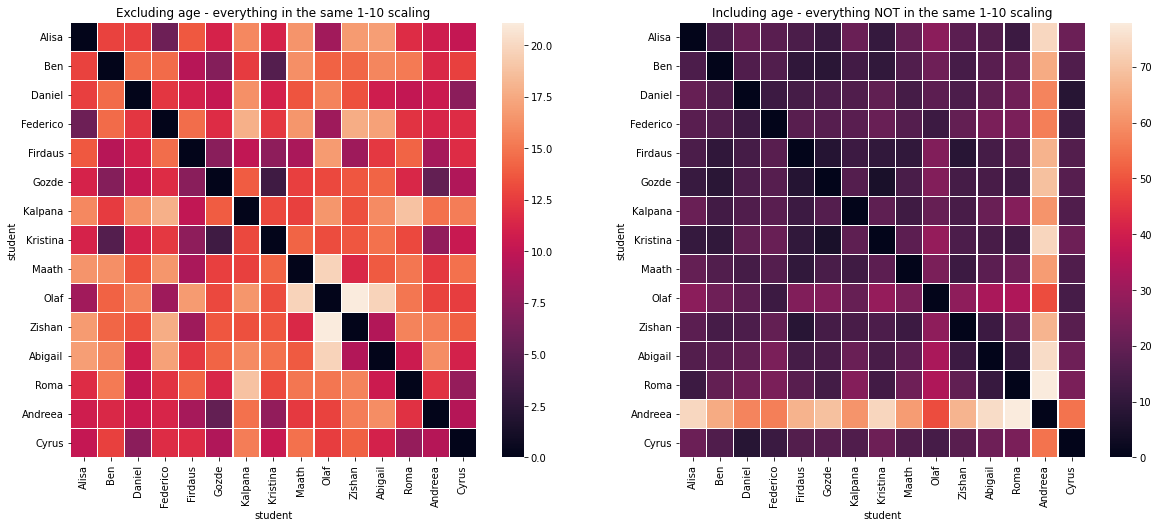

In [ ]:
#@title Making the DataFrame for the heatmap excluding age
# Making the DataFrame for the heatmap excluding age
no_age_df = df.drop('age', axis=1).copy()
no_age_distances_df = pd.DataFrame(pairwise_distances(no_age_df), index=no_age_df.index, columns=no_age_df.index)

# Making the DataFrame for the heatmap including age
with_age_distances_df = pd.DataFrame(pairwise_distances(df), index=df.index, columns=df.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(no_age_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(with_age_distances_df, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Excluding age - everything in the same 1-10 scaling')
ax2.set_title('Including age - everything NOT in the same 1-10 scaling')

plt.show()

Looks like the ages affect our distances a lot. Now all that is influencing similarity is age and not food preferences. We need to scale our data so that the age does not hide all the other differences.

## Scalers
When we scale with SKLearn we get the choice to use a variety of scalers of transformers. Scalers do not change the distribution of the data, they change the range of the data.

> **Remember:** Range = Max - Min

### Min and Max Scaling
All columns get scaled between 0 and 1. The lowest value of a column becomes 0, the highest value of a column becomes 1, and all other values get scaled in between. 


$newValue = \frac{oldValue - min(column)}{max(column) - min(column)}$


Let's have a look at how this affects the age column:

In [ ]:
# Import MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

# Create DataFrame of MinMax scaled values
min_max_df = MinMaxScaler().fit_transform(df)
with_age_minmax = pd.DataFrame(min_max_df, columns=df.columns, index=df.index)

# Display age column of original DataFrame and age column of MinMaxed DataFrame to compare
pd.DataFrame({
    'original': df.iloc[:,-1], 
    'min_max_scale': with_age_minmax.iloc[:,-1]
}).sort_values(by='original')

,original,min_max_scale
student,,
Roma,22,0.000000
Alisa,26,0.051948
Kristina,26,0.051948
Abigail,26,0.051948
Gozde,30,0.103896
Firdaus,33,0.142857
Zishan,34,0.155844
Ben,35,0.168831
Maath,38,0.207792


If we plot both the original ages and the MinMax scaled ages below, you'll see that MinMax does not affect shape of the data, it only affects the range on the x-axis.

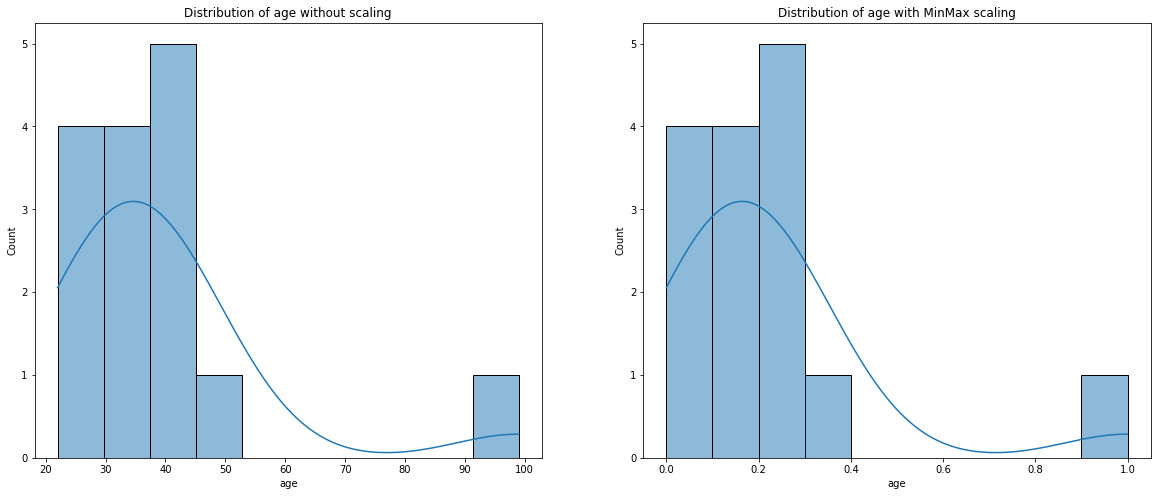

In [ ]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=df.iloc[:,-1], bins=10, kde=True, ax=ax1);
sns.histplot(with_age_minmax.iloc[:,-1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Distribution of age without scaling')
ax2.set_title('Distribution of age with MinMax scaling')

plt.show()

Let's have a look at the affect MinMax scaling had on the heatmap

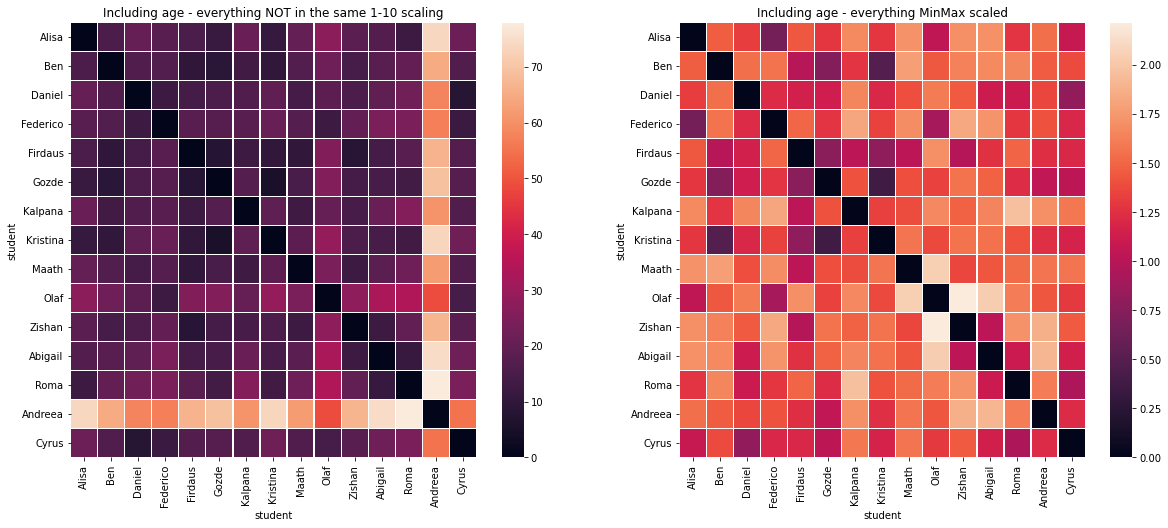

In [ ]:
# Making the DataFrame for the MinMaxed heatmap
with_age_minmax_distances = pd.DataFrame(pairwise_distances(with_age_minmax), index=df.index, columns=df.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(with_age_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(with_age_minmax_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Including age - everything NOT in the same 1-10 scaling')
ax2.set_title('Including age - everything MinMax scaled')

plt.show()

By ensuring that all of the columns are scaled between 0 and 1, we prevent any column with a much larger scale having a much larger affect on our final output.

### Standard scaler

All of the columns get scaled according to the standard deviation of the column. The standard deviation equals one, and all other values get scaled accordingly. In addition to this the data gets centered around 0 as the mean. This means that the mean becomes 0 and, therefore, all values less than the mean will be negative, and all values higher than the mean will be positive.

$newValue = \frac{oldValue - mean(column)}{std(column)}$

Let's have a look at how this affects the age column:

In [ ]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Create DataFrame of Standar scaled values
standard_df = StandardScaler().fit_transform(df)
with_age_standard = pd.DataFrame(standard_df, columns=df.columns, index=df.index)

# Display age column of original DataFrame and age column of MinMaStandard scaledxed DataFrame to compare
pd.DataFrame({
    'original': df.iloc[:,-1], 
    'standard_scale': with_age_standard.iloc[:,-1]
}).sort_values(by='original')

,original,standard_scale
student,,
Roma,22,-0.974356
Alisa,26,-0.750366
Kristina,26,-0.750366
Abigail,26,-0.750366
Gozde,30,-0.526376
Firdaus,33,-0.358384
Zishan,34,-0.302386
Ben,35,-0.246389
Maath,38,-0.078396


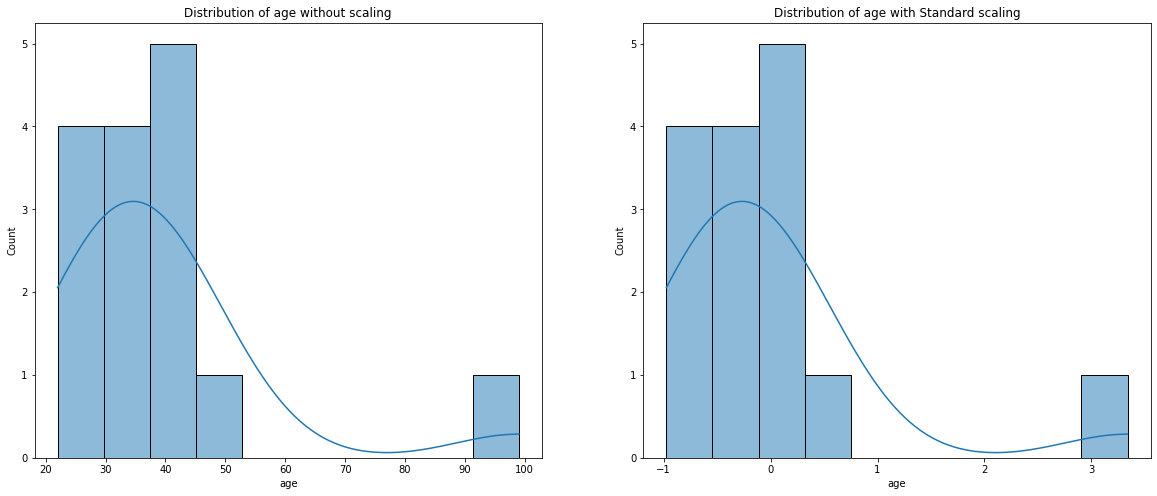

In [ ]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=df.iloc[:,-1], bins=10, kde=True, ax=ax1);
sns.histplot(with_age_standard.iloc[:,-1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Distribution of age without scaling')
ax2.set_title('Distribution of age with Standard scaling')

plt.show()

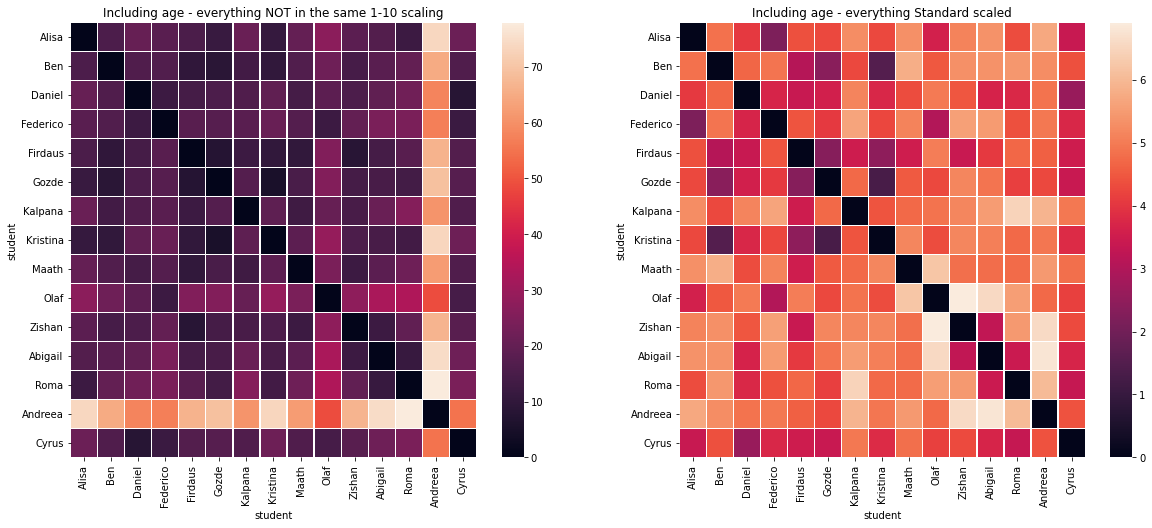

In [ ]:
# Making the DataFrame for the Standard heatmap
with_age_standard_distances = pd.DataFrame(pairwise_distances(with_age_standard), index=df.index, columns=df.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(with_age_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(with_age_standard_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Including age - everything NOT in the same 1-10 scaling')
ax2.set_title('Including age - everything Standard scaled')

plt.show()

### Robust scaler

All of the columns get scaled between their interquartile ranges. The lowest value of the column equals the first quartile, the highest value of the column equals the third quartile, and all other values get scaled in between. In addition to this the data gets centered around 0 as the median. This means that the median becomes 0 and, therefore, all values less than the median will be negative, and all values higher than the median will be positive.

$ newValue = \frac{oldValue - median(column)}{IQR(column)}$

Let's have a look at how this affects the age column:

In [ ]:
# Import Robust Scaler
from sklearn.preprocessing import RobustScaler

# Create DataFrame of Robust scaled values
robust_df = RobustScaler().fit_transform(df)
with_age_robust = pd.DataFrame(robust_df, columns=df.columns, index=df.index)

# Display age column of original DataFrame and age column of Robust DataFrame to compare
pd.DataFrame({
    'original': df.iloc[:,-1], 
    'robust_scale': with_age_robust.iloc[:,-1]
}).sort_values(by='original')

,original,robust_scale
student,,
Roma,22,-0.896552
Alisa,26,-0.620690
Kristina,26,-0.620690
Abigail,26,-0.620690
Gozde,30,-0.344828
Firdaus,33,-0.137931
Zishan,34,-0.068966
Ben,35,0.000000
Maath,38,0.206897


In [ ]:
df.iloc[:,-1].quantile([0, 0.25, 0.5, 0.75, 1])

0.00    22.0
0.25    28.0
0.50    35.0
0.75    42.5
1.00    99.0
Name: age, dtype: float64

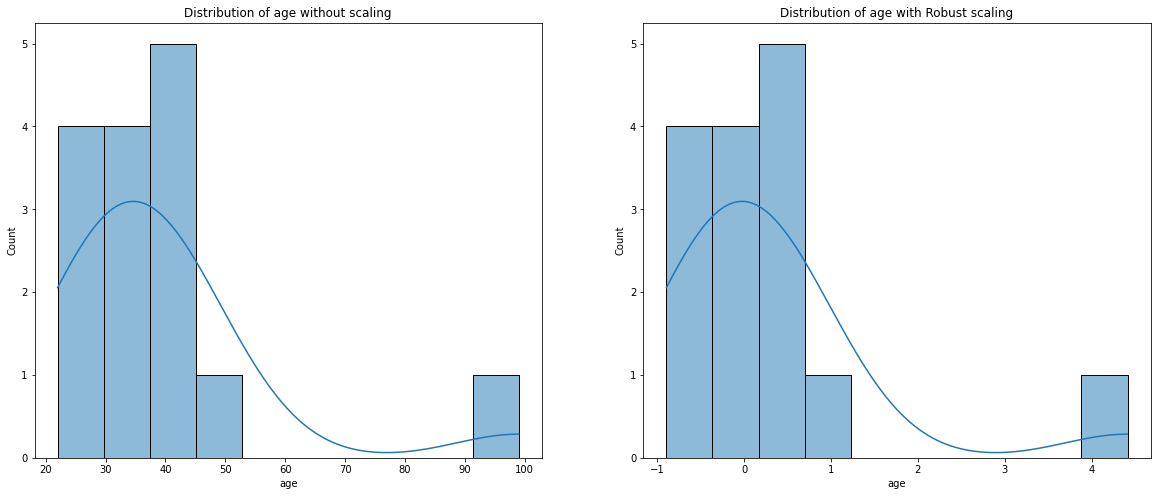

In [ ]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=df.iloc[:,-1], bins=10, kde=True, ax=ax1);
sns.histplot(with_age_robust.iloc[:,-1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Distribution of age without scaling')
ax2.set_title('Distribution of age with Robust scaling')

plt.show()

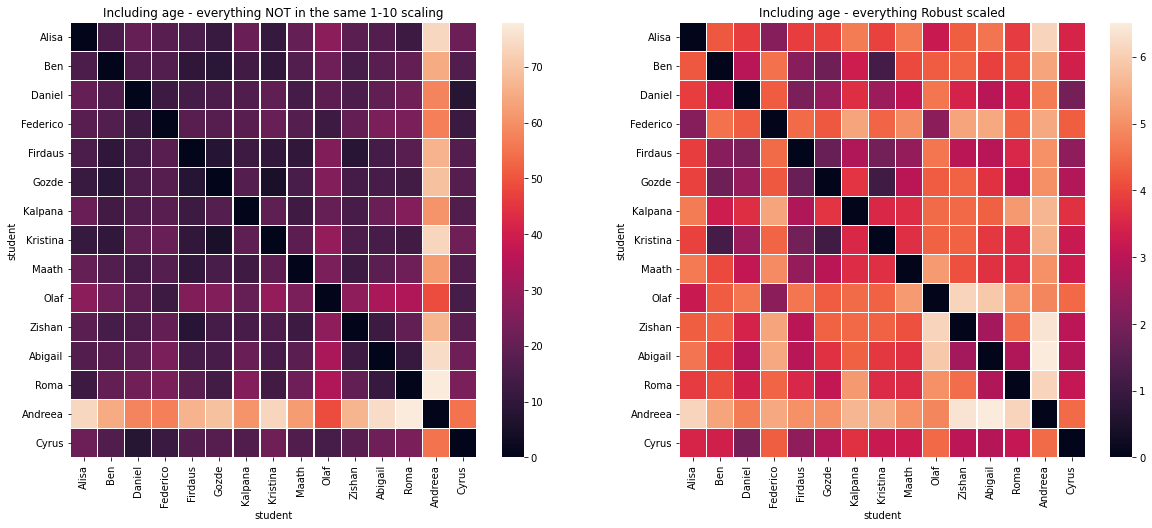

In [ ]:
#@title Making the DataFrame for the Robust heatmap
# Making the DataFrame for the Robust heatmap
with_age_robust_distances = pd.DataFrame(pairwise_distances(with_age_robust), index=df.index, columns=df.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(with_age_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(with_age_robust_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Including age - everything NOT in the same 1-10 scaling')
ax2.set_title('Including age - everything Robust scaled')

plt.show()

StandardScaler is useful for the features that follow a Normal distribution.Therefore, it makes mean = 0 and scales the data to unit variance.

MinMaxScaler may be used when the upper and lower boundaries are well known from domain knowledge.MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset.This scaling compresses all the inliers in the narrow range.

The robust scaler can often be a good idea, it's designed to help against outliers affecting the data by using the interquartile range instead of the full range (like the minmax scaler). Unfortunately, here it hasn't helped much because the interquartile range of the age column is so much larger than the interquartile range of any other column, and therefore the age column still distorts our concept of similarity (distance).

## Transformers
Transformers change the distribution to more closely resemble a normal distribution. Data that conforms to the normal distribution in machine learning is advantageous for model construction since it simplifies the maths. The assumption that the distribution is normal is explicitly used in the calculations for models like LDA, Gaussian Naive Bayes, Logistic Regression, Linear Regression, etc.

### Quantile transformer

All of the columns get scaled according to their [quantile](https://en.wikipedia.org/wiki/Quantile).

> **Note:** Quantiles are divisions of the data, which tell us how much of the data is present below this point. For example, the median is the middle of the data, this is therefore a quantile of 0.5, half of the data exists at or below this point. By the same measure, 78% of the data exists at or below the quantile 0.78.

Let's have a look at how this affects the age column:

In [ ]:
# Import Quantile Transformer
from sklearn.preprocessing import QuantileTransformer

# Create DataFrame of Quantile transformed values
quantile_df = QuantileTransformer(n_quantiles=len(df.iloc[:,-1])).fit_transform(df)
with_age_quantile = pd.DataFrame(quantile_df, columns=df.columns, index=df.index)

# Display age column of original DataFrame and age column of Quantile DataFrame to compare
pd.DataFrame({
    'original': df.iloc[:,-1], 
    'quantile_transformed': with_age_quantile.iloc[:,-1]
}).sort_values(by='original')

,original,quantile_transformed
student,,
Roma,22,0.000000
Alisa,26,0.142857
Kristina,26,0.142857
Abigail,26,0.142857
Gozde,30,0.285714
Firdaus,33,0.357143
Zishan,34,0.428571
Ben,35,0.500000
Maath,38,0.571429


If ever you'd like to check quantiles in a Series, you can always use pandas .[quantile](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.quantile.html) method.

In [ ]:
df.iloc[:,-1].quantile([0, 0.2, 0.4, 0.6, 0.8, 1])

0.0    22.0
0.2    26.0
0.4    33.6
0.6    38.8
0.8    43.4
1.0    99.0
Name: age, dtype: float64

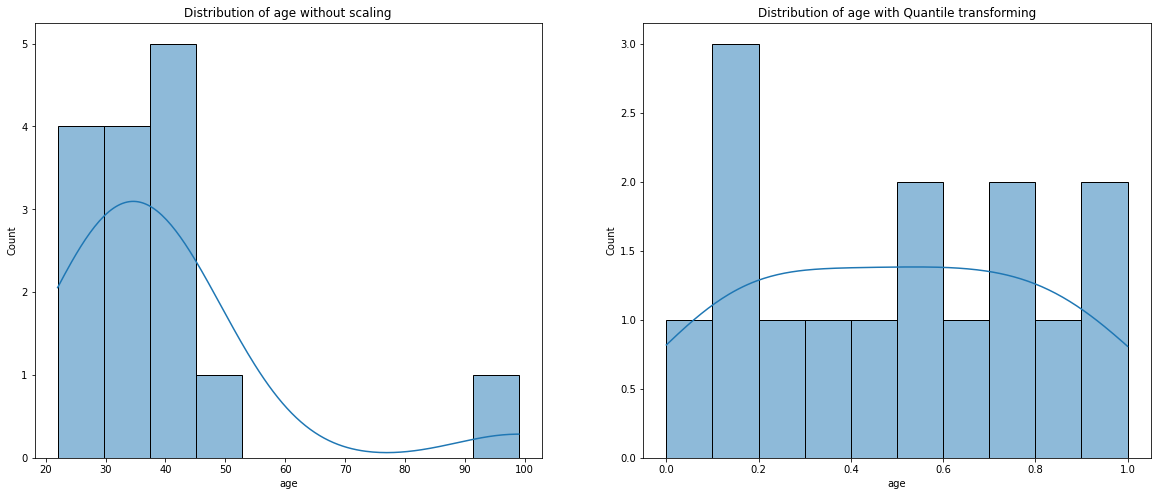

In [ ]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=df.iloc[:,-1], bins=10, kde=True, ax=ax1);
sns.histplot(with_age_quantile.iloc[:,-1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Distribution of age without scaling')
ax2.set_title('Distribution of age with Quantile transforming')

plt.show()

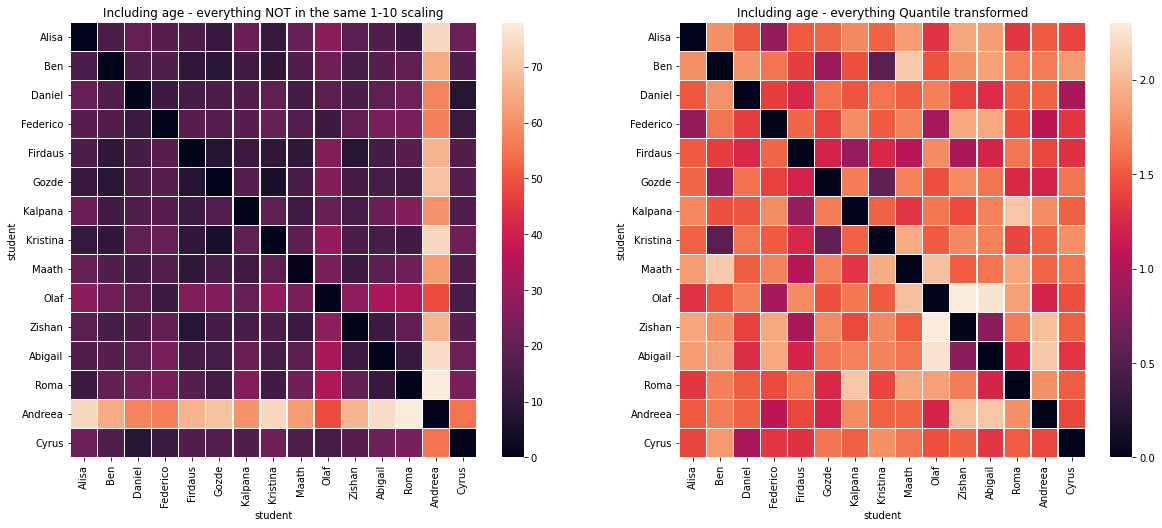

In [ ]:
# Making the DataFrame for the Quantile heatmap
with_age_quantile_distances = pd.DataFrame(pairwise_distances(with_age_quantile), index=df.index, columns=df.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(with_age_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(with_age_quantile_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Including age - everything NOT in the same 1-10 scaling')
ax2.set_title('Including age - everything Quantile transformed')

plt.show()

### Power transformer

Power transformers transform the data via [power functions](https://en.wikipedia.org/wiki/Power_transform). They can use either the Yeo-Johnson transformation, or the Box-Cox transformation. You don't need to understand the maths behind this one, just know that it reshapes the data to more closely resemble the normal distribution.


Let's have a look at how this affects the age column:

In [ ]:
# Import Power Transformer
from sklearn.preprocessing import PowerTransformer

# Create DataFrame of Power transformed values
power_df = PowerTransformer().fit_transform(df)
with_age_power = pd.DataFrame(power_df, columns=df.columns, index=df.index)

# Display 1st column of original DataFrame and 1st column of Power transformed DataFrame to compare
pd.DataFrame({
    'original': df.iloc[:,-1], 
    'power_transformed': with_age_power.iloc[:,-1]
}).sort_values(by='original')

,original,power_transformed
student,,
Roma,22,-1.919936
Alisa,26,-1.108526
Kristina,26,-1.108526
Abigail,26,-1.108526
Gozde,30,-0.514617
Firdaus,33,-0.164590
Zishan,34,-0.061821
Ben,35,0.034988
Maath,38,0.294367


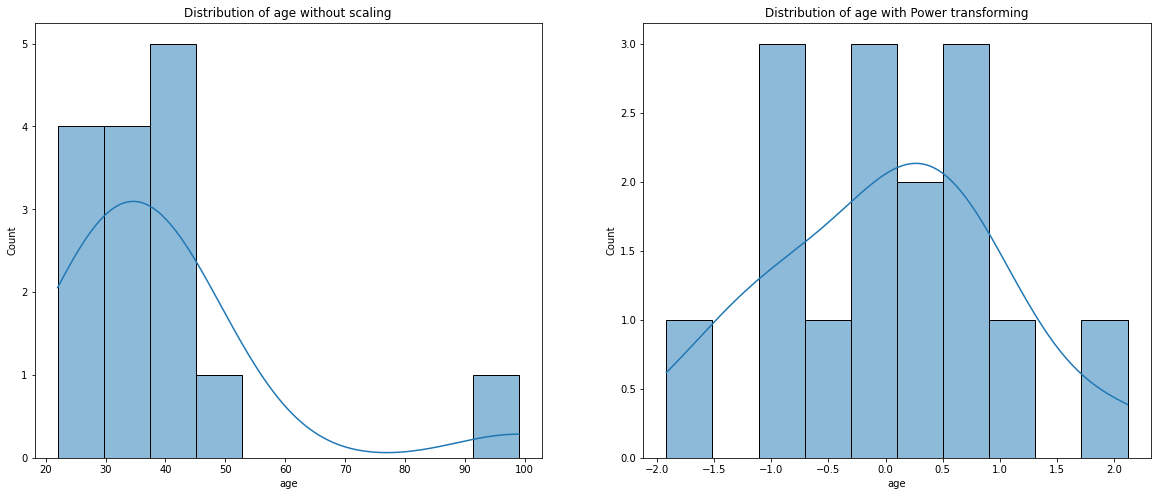

In [ ]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=df.iloc[:,-1], bins=10, kde=True, ax=ax1);
sns.histplot(data=with_age_power.iloc[:,-1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Distribution of age without scaling')
ax2.set_title('Distribution of age with Power transforming')

plt.show()

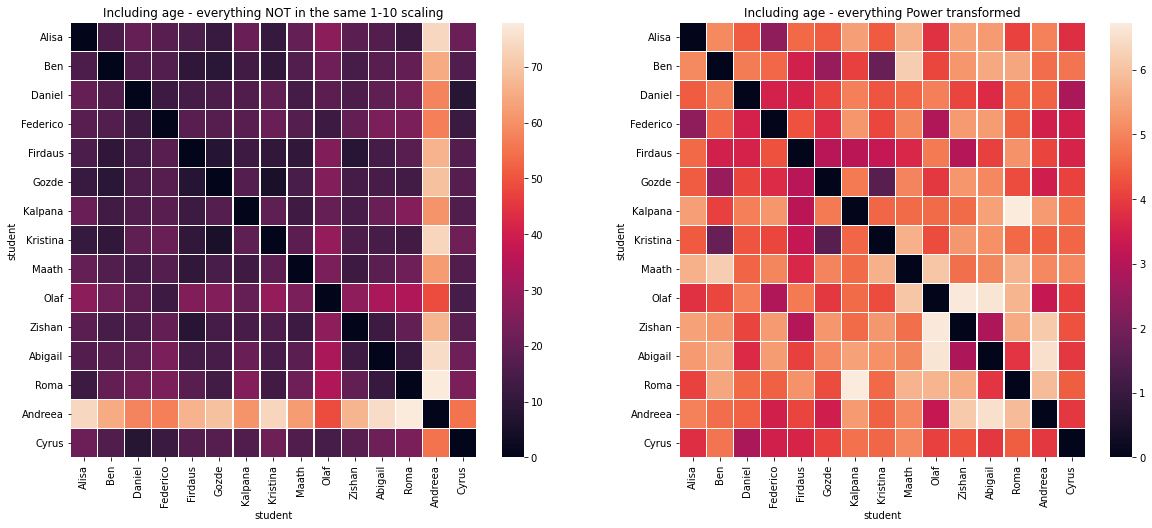

In [ ]:
# Making the DataFrame for the Power heatmap
with_age_power_distances = pd.DataFrame(pairwise_distances(with_age_power), index=df.index, columns=df.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(with_age_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(with_age_power_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Including age - everything NOT in the same 1-10 scaling')
ax2.set_title('Including age - everything Power transformed')

plt.show()

## All 6 histograms for comparison

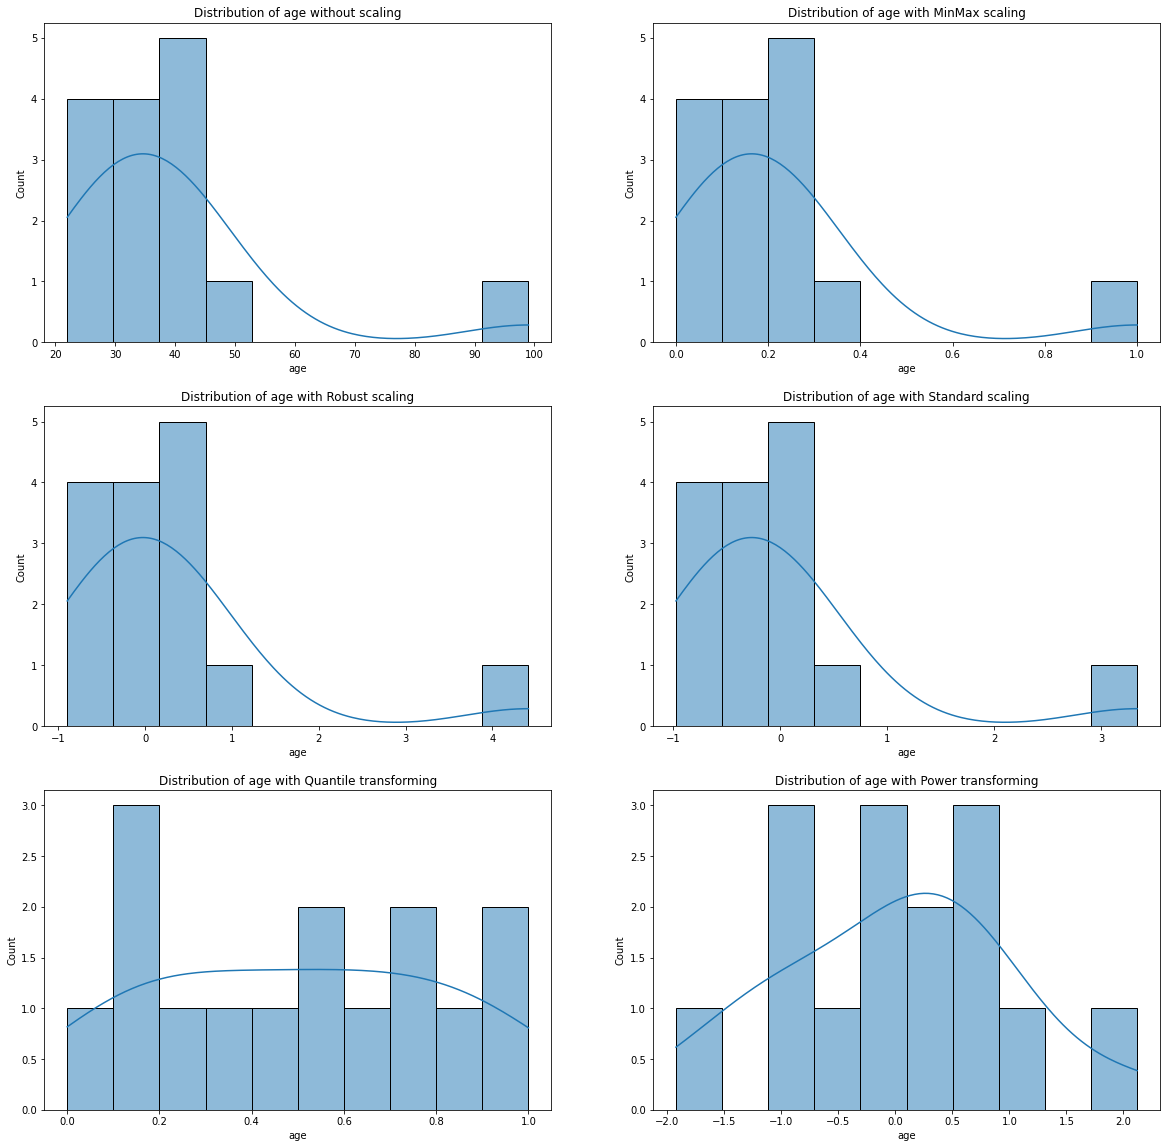

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

sns.histplot(data=df.iloc[:,-1], bins=10, kde=True, ax=ax[0, 0]);
sns.histplot(data=with_age_minmax.iloc[:,-1], bins=10, kde=True, ax=ax[0, 1]);
sns.histplot(data=with_age_robust.iloc[:,-1], bins=10, kde=True, ax=ax[1, 0]);
sns.histplot(data=with_age_standard.iloc[:,-1], bins=10, kde=True, ax=ax[1, 1]);
sns.histplot(data=with_age_quantile.iloc[:,-1], bins=10, kde=True, ax=ax[2, 0]);
sns.histplot(data=with_age_power.iloc[:,-1], bins=10, kde=True, ax=ax[2, 1]);

ax[0, 0].set_title('Distribution of age without scaling')
ax[0, 1].set_title('Distribution of age with MinMax scaling')
ax[1, 0].set_title('Distribution of age with Robust scaling')
ax[1, 1].set_title('Distribution of age with Standard scaling')
ax[2, 0].set_title('Distribution of age with Quantile transforming')
ax[2, 1].set_title('Distribution of age with Power transforming')

plt.show()

## All 6 heatmaps for comparison

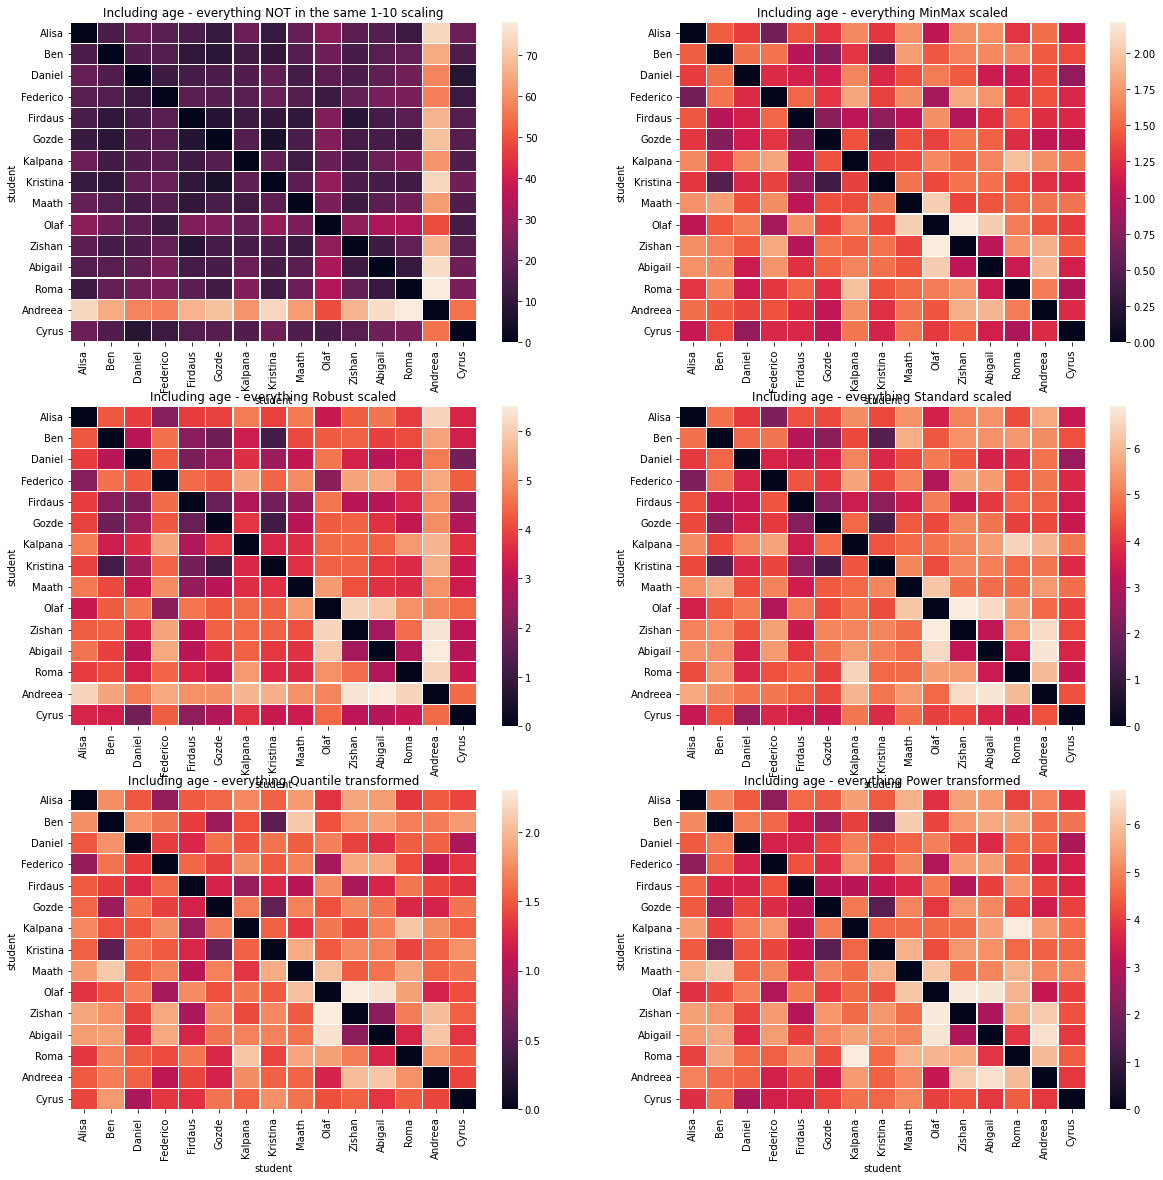

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

sns.heatmap(with_age_distances_df, ax=ax[0, 0], linewidths=.2);
sns.heatmap(with_age_minmax_distances, ax=ax[0, 1], linewidths=.2);
sns.heatmap(with_age_robust_distances, ax=ax[1, 0], linewidths=.2);
sns.heatmap(with_age_standard_distances, ax=ax[1, 1], linewidths=.2);
sns.heatmap(with_age_quantile_distances, ax=ax[2, 0], linewidths=.2);
sns.heatmap(with_age_power_distances, ax=ax[2, 1], linewidths=.2);

ax[0, 0].set_title('Including age - everything NOT in the same 1-10 scaling')
ax[0, 1].set_title('Including age - everything MinMax scaled')
ax[1, 0].set_title('Including age - everything Robust scaled')
ax[1, 1].set_title('Including age - everything Standard scaled')
ax[2, 0].set_title('Including age - everything Quantile transformed')
ax[2, 1].set_title('Including age - everything Power transformed')

plt.show()

[SKLearn: Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)